## K-Nearest Neighbors (KNN)
- K-Nearest Neighbours (KNN) is a supervised machine learning algorithm.
- It can be used for both **classification** (predicting discrete labels) and **regression** (predicting continuous values) tasks.
- The algorithm predicts the output for a data point based on the output of its nearest neighbours in feature space.
- Predictions are made based on the nearest data points in the training set using a distance metric (e.g. Euclidean distance, Manhattan distance).
- KNN is a lazy learner because it does not create an explicit model during the training phase. Instead, it memorises the training data set.
- KNN makes **no** assumptions about the underlying data distribution.
- KNN is effective for **small**, **well-labelled** datasets, but struggles in **high dimensions** or with **noisy data**.

### Algorithm

1. Choose the number of neighbours (k).
2. Calculate the distance (e.g. Euclidean distance, Manhattan distance)
3. Find nearest neighbours
4. **For classification:** Count the labels among the k neighbours and predict the most common label. **→ Majority Voting**
5. **For regression:** Calculate the average of the values of the k neighbours to predict the outcome.**→ Averaging**

### Use Cases:
- Fraud detection.
- Image recognition.
- Predicting house prices (regression).

## Question 1: KNN for Classification 
Write a Python implementation of the KNN algorithm for a classification problem. Include steps for distance computation and majority voting. 

In [1]:
import numpy as np
from collections import Counter

class KNN_Classifier:
    '''
    Initialize the classifier with a parameter
    '''
    def __init__(self, k): 
        self.k = k 
    
    '''
    Store the training data (X_train) and their corresponding labels (y_train) 
    '''
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.y_train = Y_train

    '''
    Predict the labels for a test dataset X_test.
    '''
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    '''
    Classify a single test point x by finding its nearest neighbors.
    '''
    def _predict(self, x):
        #1.Compute distances
        distances = [np.linalg.norm(x - x_train) for x_train in X_train]
        print(f"Test Point: {x}")
        print(f"Distances: {distances}")
        
        # 2. Sorts the distances in ascending order and retrieves the labels of the nearest neighbors
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        print(f"k Nearest Indices: {k_indices}")
        
        # Get their corresponding labels from y_train.
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        print(f"k Nearest Labels: {k_nearest_labels}")

        #3. Majority voting : 
        # counts the occurrences of each label among the k neighbors and retrieves the label with the highest count..
        most_common = Counter(k_nearest_labels).most_common(1) 
        '''categorize based on majority voting'''
        print(f"Predicted Label: {most_common[0][0]}")
        return most_common[0][0]


#---------------------
#Example
#---------------------
X_train = np.array([[1, 2], [2, 3], [3, 3], [5, 6], [6, 7], [7, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_test = np.array([[5, 5], [2, 2]])

knn = KNN_Classifier(k=3)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
print("Predictions:", predictions)

Test Point: [5 5]
Distances: [5.0, 3.605551275463989, 2.8284271247461903, 1.0, 2.23606797749979, 3.605551275463989]
k Nearest Indices: [3 4 2]
k Nearest Labels: [1, 1, 0]
Predicted Label: 1
Test Point: [2 2]
Distances: [1.0, 1.0, 1.4142135623730951, 5.0, 6.4031242374328485, 7.810249675906654]
k Nearest Indices: [0 1 2]
k Nearest Labels: [0, 0, 0]
Predicted Label: 0
Predictions: [1 0]


### Follow-up: 
How would you **optimize KNN for a high-dimensional** dataset?

1. **Reduce Dimensions:** use PCA or t-SNE teqniuque to minimize noise and irrelevant features
2. **Select Distance Metric:** depending on the type of data, try other methods for calculateing distance (e.g., cosine similarity or Mahalanobis distance).
3. **Choose Faster Neighbour Search methods:** Searching through all points can be slow. Use smarter methods like KDTree, BallTree, or libraries like FAISS to speed it up.
4. **Normalize Features:** If features have very different scales (e.g., one in meters, another in grams), the bigger numbers dominate. Standardize or normalize them so all features contribute equally.
5. **Handle Sparse Data:** If your data has lots of empty values (like in text analysis), use special distances like Hamming distance or methods designed for sparse data to improve accuracy and speed.

In [2]:
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import KDTree

class OptimizedKNNClassifier:
    def __init__(self, k=3, n_components=None):
        self.k = k
        self.n_components = n_components  # Number of dimensions to reduce to with PCA
        self.scaler = StandardScaler()   # For feature scaling
        self.pca = None                  # PCA instance
        self.tree = None                 # KDTree instance
        self.y_train = None              # Labels

    def fit(self, X_train, Y_train):
        # Scale features to have mean=0 and variance=1
        X_train = self.scaler.fit_transform(X_train)

        # Reduce dimensionality if n_components is set
        if self.n_components:
            self.pca = PCA(n_components=self.n_components)
            X_train = self.pca.fit_transform(X_train)

        # Store training data and labels
        self.tree = KDTree(X_train)
        self.y_train = Y_train

    def predict(self, X_test):
        # Scale and reduce dimensions for the test set
        X_test = self.scaler.transform(X_test)
        if self.pca:
            X_test = self.pca.transform(X_test)

        # Predict labels for each test point
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Query KDTree to find the k nearest neighbors
        distances, indices = self.tree.query(x, k=self.k)

        # Retrieve the labels of the nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in indices]

        # Majority voting
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# ---------------------
# Example
# ---------------------
X_train = np.array([[1, 2], [2, 3], [3, 3], [5, 6], [7, 8]])
y_train = np.array([0, 0, 0, 1, 1])
X_test = np.array([[5, 5], [2, 2]])

# Initialize the optimized KNN classifier
knn = OptimizedKNNClassifier(k=3, n_components=2)  # Reduce to 2 dimensions using PCA
knn.fit(X_train, y_train)

# Predict labels for the test set
predictions = knn.predict(X_test)
print("Predictions:", predictions)


Predictions: [1 0]


## Question 2: KNN for Regression

In regression, instead of majority voting (used in classification), KNN calculates the **average value of the nearest neighbors** to predict the output for a test point.

In [3]:
import numpy as np

class KNNRegressor:

    """
    Initialize the KNN Regressor with the number of neighbors k.
    """
    def __init__(self, k=3):
        self.k = k

    """
    Store the training data and labels.
    """
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train


    """
    Predict the target value for each test point in X_test.
    """
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)


    """
    Predict the target value for a single test point x.
    """
    def _predict(self, x):
        # Step 1: Compute distances between x and all training points
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]

        # Step 2: Find indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Step 3: Retrieve target values of the nearest neighbors
        k_nearest_values = [self.y_train[i] for i in k_indices]

        # Step 4: Return the average of the k nearest values
        return np.mean(k_nearest_values) 
        '''average of neighbors values '''

# ---------------------
# Example Usage
# ---------------------
if __name__ == "__main__":
    # Step 1: Create training data
    X_train = np.array([[1], [2], [3], [4], [5]])
    y_train = np.array([2.2, 2.8, 3.6, 4.5, 5.1])  # Regression target values

    # Step 2: Create test data
    X_test = np.array([[1.5], [3.5]])

    # Step 3: Initialize and fit the model
    knn = KNNRegressor(k=2)
    knn.fit(X_train, y_train)

    # Step 4: Predict target values for test data
    predictions = knn.predict(X_test)
    print("Predictions:", predictions)


Predictions: [2.5  4.05]


In the following examples, I used the **Scikit-Learn** library and its **KNeighborsClassifier** and **KNeighborsRegressor** modules to demonstrate the K-Nearest Neighbors (KNN) algorithm. 

Accuracy: 1.0


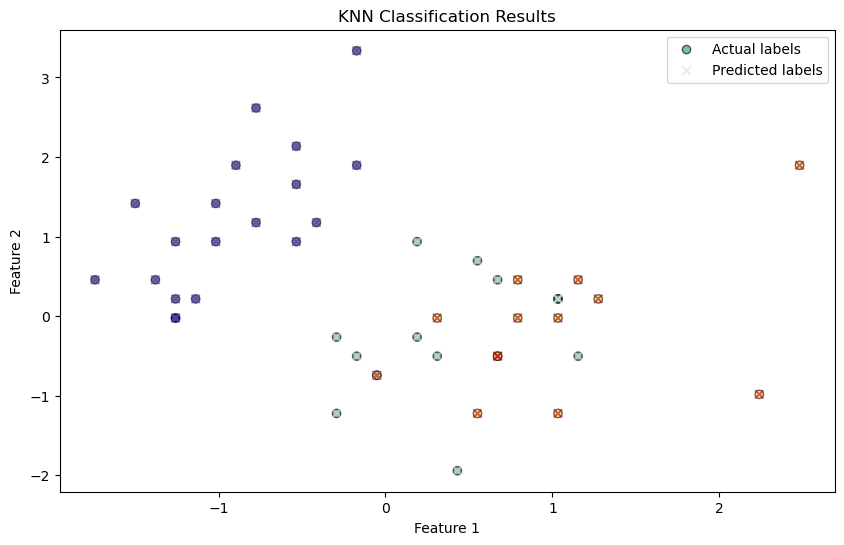

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='Actual labels', alpha=0.6, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted labels', alpha=0.6)
plt.title("KNN Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Mean Squared Error: 116.56126316731293


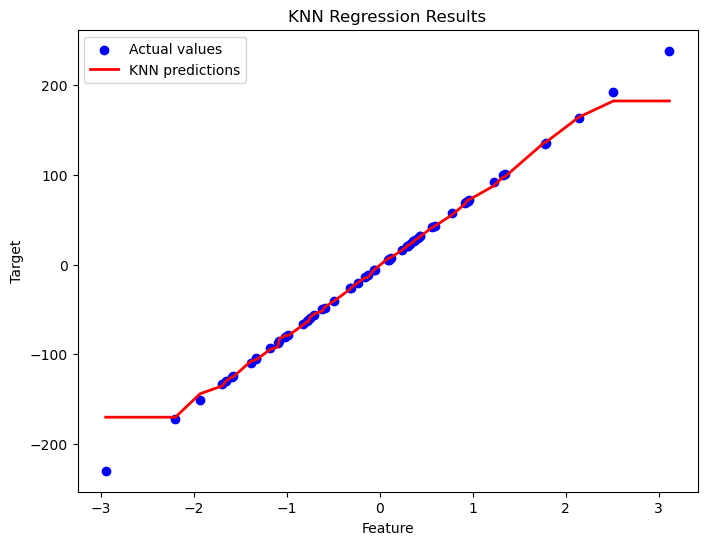

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Sort test data for smoother plotting
sorted_indices = X_test[:, 0].argsort()
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual values")
plt.plot(X_test_sorted, y_pred_sorted, color="red", label="KNN predictions", linewidth=2)
plt.title("KNN Regression Results")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()
